# 분류모형 기본 예제
- 대출을 허락할거냐 안할거냐?
- 코로나 음성/양성 진단

## 데이터 불러오기

In [18]:
from sklearn.datasets import load_iris               # 예제 데이터 불러오기
from sklearn.tree import DecisionTreeClassifier      # 결정트리 머신러닝 알고리즘 중 하나
from sklearn.model_selection import train_test_split # 훈련 데이터 / 테스트 데이터
from sklearn.tree import DecisionTreeRegressor


iris = load_iris()
iris_data = iris.data  # 독립변수
iris_label = iris.target # 종속변수

print('iris target', iris_label)
# print('iris data', iris_data)
print('iris target명', iris.target_names)

iris target [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명 ['setosa' 'versicolor' 'virginica']


In [19]:
import pandas as pd
iris_df = pd.DataFrame(data=iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [20]:
import seaborn as sns
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [21]:
# 0은 setosa, 1은 versicolor 2는 virginica 품종으로 구분
X_train, X_test, y_train, y_test = train_test_split(
    iris_data     # 독립변수
    , iris_label # 종속변수
    , test_size=0.2
    , random_state=2023
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

## 모형 학습 코드
- 참고 : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [22]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeRegressor(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeRegressor(random_state=11)

## 모형 예측

In [23]:
pred = dt_clf.predict(X_test)
pred

array([2., 1., 1., 2., 1., 2., 1., 1., 0., 1., 0., 1., 0., 2., 0., 2., 0.,
       1., 0., 0., 1., 0., 2., 1., 0., 0., 0., 2., 1., 0.])

## 모형 평가

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

1.0


# K 폴드
- 102p

## 데이터 불러오기

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=11)

print("붓꽃 데이터 세트 크기:", features.shape[0])

붓꽃 데이터 세트 크기: 150


## KFold 코드

In [38]:
kfold = KFold(n_splits=5) # 5개의 폴드 데이터 생성
cv_accuracy = []
n_iter = 0

# KFold 객체의 split() 호출하면, 폴드 별, 학습용, 검증용 테스트 Row index 배열로 반환
for train_index, test_index in kfold.split(features):

  X_train, X_test = features[train_index], features[test_index] # 독립변수
  y_train, y_test = label[train_index], label[test_index] # 종속변수

  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)

  n_iter += 1

  # 반복 시마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
  cv_accuracy.append(accuracy)


print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print("## 교차 검증별 정확도: [0.9667 0.9667 0.9    0.9667 1.    ]")
print("\n## 평균 검증 정확도", np.mean(cv_accuracy))
print("## 평균 검증 정확도: 0.96")


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.8333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [1.     0.9667 0.8667 0.9333 0.8333]
## 교차 검증별 정확도: [0.9667 0.9667 0.9    0.9667 1.    ]

## 평균 검증 정확도 0.9200000000000002
## 평균 검증 정

## Stratified K 폴드
- Stratified 의미 파악
- 층화추출에서 유래
--> 갤럽 설문조사 기억

- 분류모델에서 Stratified K 폴드 꼭 써야 함
- 이유 : 104p 하단
  + 범주 예측 (100건 연체, 9900건 정상)
- 훈련데이터 / 테스트 분리
  + 훈련데이터 99건 연체 / 6901건 정상
  + 테스트데이터 1건 연체 / 나머지 정상

In [27]:
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [28]:
kfold = KFold(n_splits=3)
# 폴드 세트를 3번 반복한다.

n_iter = 0
for train_index, test_index in kfold.split(iris_df):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


In [29]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


## 모형 학습 및 예측 평가
- p.108

In [37]:
dt_clf = DecisionTreeClassifier(random_state=11)
skfold = StratifiedKFold(n_splits=5)
n_iter = 0
cv_accuracy = []

for train_index, test_index in skfold.split(features, label):
  # print(train_index, test_index)
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]

  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)

  # 반복 시마다 정확도 측정
  n_iter += 1
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]

  # format ==> f-string 변환
  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))

  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
  cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.round(np.mean(cv_accuracy), 4))


#1 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[ 10  11  12  13  14  15  16  17  18  19  60  61  62  63  64  65  66  67
  68  69 110 111 112 113 114 115 116 117 118 119]

#3 교차 검증 정확도 :0.9, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[ 20  21  22  23  24  25  26  27  28  29  70  71  72  73  74  75  76  77
  78  79 120 121 122 123 124 125 126 127 128 129]

#4 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 30  31  32  33  34  35  36  37  38  39  80  81  82  83  84  85  86  87
  88  89 130 131 132 133 134 135 136 137 138 139]

#5 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[ 40  41  42  43  44  45  46  47  48  49  90  91  92  93  94  95  96  97
  98  99 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.9667 0.9667 0.9    0.9667 1.    ]
## 평균 검증

- cross_val_score()
  + 반복문 코드 줄여줌

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=11)

data = iris_data.data
label = iris_data.target

# 성능 징표는 정확도, 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print(np.round(scores))


[1. 1. 1.]


# GridSearchCV


1.0


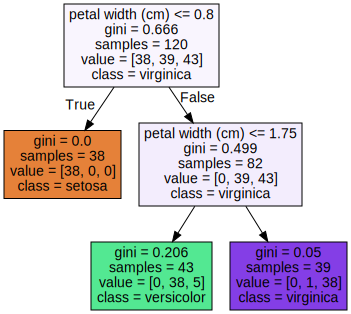

In [63]:
from sklearn.datasets import load_iris               # 예제 데이터 불러오기
from sklearn.tree import DecisionTreeClassifier      # 결정트리 머신러닝 알고리즘 중 하나
from sklearn.model_selection import train_test_split # 훈련 데이터 / 테스트 데이터
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

iris = load_iris()
iris_data = iris.data  # 독립변수
iris_label = iris.target # 종속변수

# 0은 setosa, 1은 versicolor 2는 virginica 품종으로 구분
X_train, X_test, y_train, y_test = train_test_split(
    iris_data     # 독립변수
    , iris_label # 종속변수
    , test_size=0.2
    , random_state=2023
)

# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11, max_depth = 2, min_samples_split=2)

# 학습 수행
dt_clf.fit(X_train, y_train)
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris.target_names,
                feature_names= iris.feature_names, impurity=True, filled=True)
pred = dt_clf.predict(X_test)

print(accuracy_score(y_test, pred))

with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=11, max_depth = 2, min_samples_split=2)

# max_depth = 1, min_samples_split = 2,  ==> 정확도는 63.3 모형 개발 1번
# max_depth = 1, min_samples_split = 3,  ==> 정확도는 70 2번째,
# max_depth = 2, min_samples_split = 2,  ==> 정확도는 75 3번째,



# GridSearchCV, RandomSearchCV
# 111p
grid_params = {
    'max_depth' : [1, 2, 3, 4, 5, 6],
    'min_samples_split' : [2, 3, 4, 5, 6]
}

# 모형을 30번 만듬
# 최고의 파라미터 조합을 찾는 것임
# best parameters 추출 가능
# 최종적인 머신러닝 파라미터입니다!!

In [66]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


# 데이터 전처리
- Feature Engineering
- 매우 중요함!!!


GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


테스트 데이터 세트 정확도: 0.9667
